In [6]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import yaml

In [7]:
#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{68}/metrics.csv')
#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{70}/metrics.csv')

#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{72}/metrics.csv')
#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{87}/metrics.csv')
#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{96}/metrics.csv')



In [19]:
the_dir = "example_results/lightning_logs/tmp_testi_oct/version_29"

df = pd.read_csv(os.path.join(the_dir, 'metrics.csv'))
df

,val_acc,val_prec,epoch,val_f1,step,val_loss,val_cc,lr-SGD,train_acc,train_cc,train_loss,unpruned_state,unpruned,train_f1,train_prec
0,NaN,NaN,NaN,NaN,0,NaN,NaN,0.00100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.510417,0.256611,0.0,0.510417,29,1.146221,4.800539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.0,NaN,29,NaN,NaN,NaN,0.464063,4.800539,1.622000,-1.0,5980.0,0.464063,0.219566
3,NaN,NaN,NaN,NaN,30,NaN,NaN,0.00100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.546875,0.294444,1.0,0.546875,59,1.091857,4.800539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.781250,0.389279,98.0,0.781250,2969,0.626146,4.773499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,NaN,NaN,98.0,NaN,2969,NaN,NaN,NaN,0.775000,4.773499,0.634701,-1.0,4675.0,0.775000,0.478002
297,NaN,NaN,NaN,NaN,2970,NaN,NaN,0.00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,0.781250,0.389279,99.0,0.781250,2999,0.626180,4.773499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
stream = open(os.path.join(the_dir, 'hparams.yaml'), 'r')
data = yaml.load(stream, Loader=yaml.Loader)
data

{'kwargs': {'model_kwargs': {'base_lr': 0.001,
   'cc_metric': 'l2',
   'cc_weight': 10,
   'ci_metric': 'l2',
   'cm_metric': 'count',
   'criterion': CrossEntropyLoss(),
   'grid_size': 324,
   'lr_update': 100,
   'min_lr': 1e-05,
   'momentum': 0.9,
   'n_classes': 4,
   'optimizer': 'sgd',
   'out_dim': [1, 8, 16, 32, 4],
   'pretrain_epochs': 20,
   'prune_keep': 0.97,
   'prune_keep_total': 0.5,
   'update_every_nth_epoch': 10},
  'train_kwargs': {'batch_size': 128,
   'device': 'cuda',
   'epochs': 100,
   'exp_name': 'tmp_testi_oct',
   'img_size': 28,
   'load_ckpt_file': 'xversion_22/checkpoints/epoch=0-unpruned=10942-val_f1=0.06.ckpt',
   'log_every_n_steps': 4,
   'num_workers': 18,
   'result_path': 'examples/example_results',
   'test_size': 24,
   'train_size': 3840,
   'val_size': 384}},
 'log_dir': 'examples/example_results\\lightning_logs\\tmp_testi_oct\\version_29'}

In [21]:
cc_metric = data['kwargs']['model_kwargs']['cc_metric']

In [22]:
ci_metric = data['kwargs']['model_kwargs']['ci_metric']

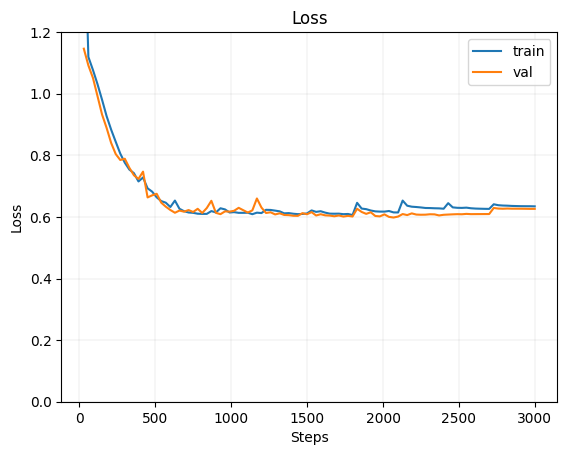

In [23]:
# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_loss']].dropna()
x_val = val_df['step']
y_val = val_df['val_loss']

train_df = df[['step', 'train_loss']].dropna()
x_train = train_df['step']
y_train = train_df['train_loss']


# Create a line plot
plt.plot(x_train, y_train, label="train")
plt.plot(x_val, y_val, label="val")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Loss')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
ax.set_ylim([0,1.2])

plt.legend()

plt.savefig(os.path.join(the_dir, 'metric_loss.png'))

# Show the plot
plt.show()



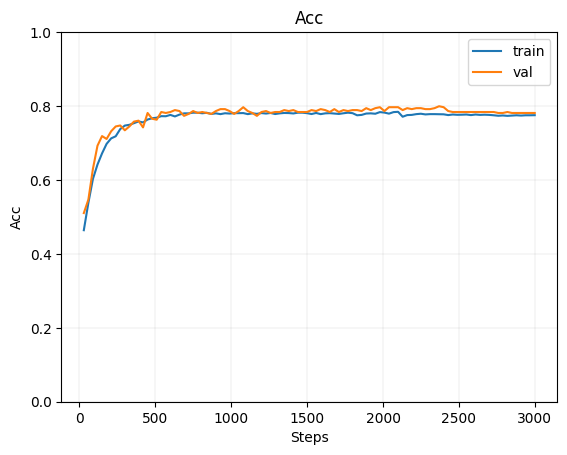

In [24]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_acc']].dropna()
x_val = val_df['step']
y_val = val_df['val_acc']

train_df = df[['step', 'train_acc']].dropna()
x_train = train_df['step']
y_train = train_df['train_acc']


# Create a line plot
plt.plot(x_train, y_train, label="train")
plt.plot(x_val, y_val, label="val")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Acc')
plt.title('Acc')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
ax.set_ylim([0,1])


plt.legend()

plt.savefig(os.path.join(the_dir, 'metric_acc.png'))


# Show the plot
plt.show()


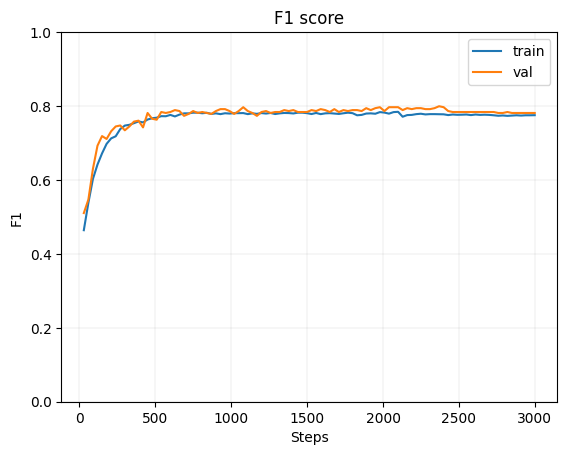

In [25]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_f1']].dropna()
x_val = val_df['step']
y_val = val_df['val_f1']

train_df = df[['step', 'train_f1']].dropna()
x_train = train_df['step']
y_train = train_df['train_f1']


# Create a line plot
plt.plot(x_train, y_train, label="train")
plt.plot(x_val, y_val, label="val")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('F1')
plt.title('F1 score')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
ax.set_ylim([0,1])

plt.legend()

plt.savefig(os.path.join(the_dir, 'metric_f1.png'))

# Show the plot
plt.show()


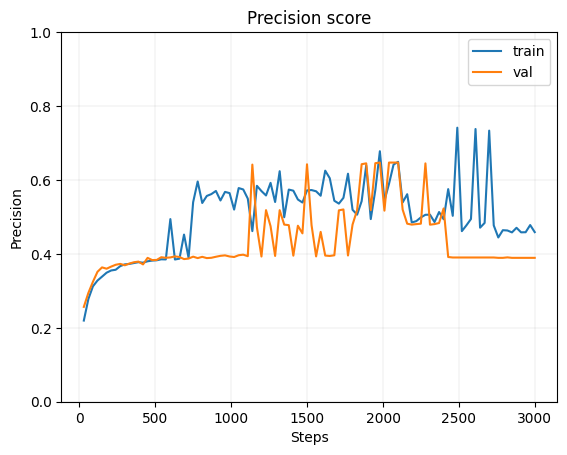

In [26]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_prec']].dropna()
x_val = val_df['step']
y_val = val_df['val_prec']

train_df = df[['step', 'train_prec']].dropna()
x_train = train_df['step']
y_train = train_df['train_prec']


# Create a line plot
plt.plot(x_train, y_train, label="train")
plt.plot(x_val, y_val, label="val")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Precision')
plt.title('Precision score')
plt.grid(color='k', linestyle='-', linewidth=0.05)


ax = plt.gca()
ax.set_ylim([0,1])

plt.legend()

plt.savefig(os.path.join(the_dir, 'metric_prec.png'))


# Show the plot
plt.show()


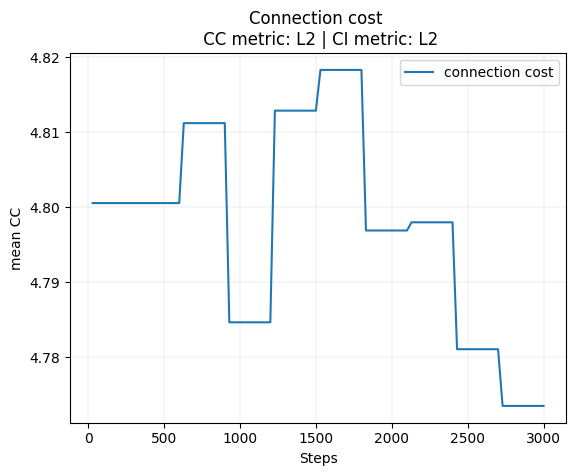

In [27]:
import matplotlib.pyplot as plt

train_df = df[['step', 'train_cc']].dropna()
x_train = train_df['step']
y_train = train_df['train_cc']


# Create a line plot
plt.plot(x_train, y_train, label="connection cost")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('mean CC')
plt.title(f'Connection cost \n CC metric: {cc_metric.upper()} | CI metric: {ci_metric.upper()}')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
# ax.set_ylim([0.075,0.125])


plt.legend()

plt.savefig(os.path.join(the_dir, 'metric_cc.png'))


# Show the plot
plt.show()


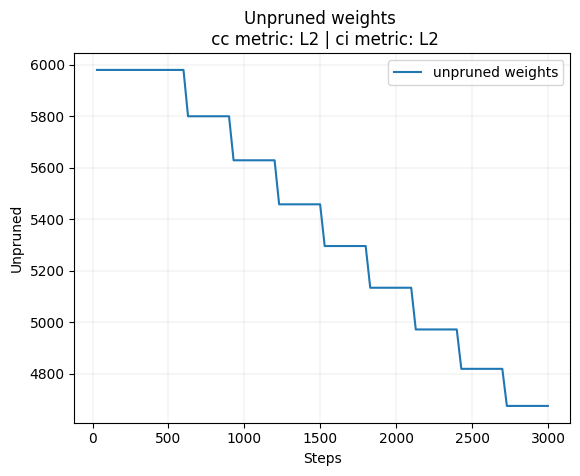

In [28]:
import matplotlib.pyplot as plt

train_df = df[['step', 'unpruned']].dropna()
x_train = train_df['step']
y_train = train_df['unpruned']


# Create a line plot
plt.plot(x_train, y_train, label="unpruned weights")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Unpruned')
plt.title(f'Unpruned weights \n cc metric: {cc_metric.upper()} | ci metric: {ci_metric.upper()}')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
# ax.set_ylim([0.075,0.125])


plt.legend()

plt.savefig(os.path.join(the_dir, 'metric_unpruned.png'))


# Show the plot
plt.show()


In [ ]:
val_df

In [ ]:
40*300

In [ ]:
list(set(df['step']))

In [ ]:
df['val_loss'].dropna()